# Mount Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Import required libraries

In [ ]:
import numpy as np
import math as mt
import random
import pandas as pd

#Import Data

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/AI Data/Ageremoved_dataset.csv')
data.head()

,phone,Laptop,TV,Headaches,Blurry vision,Specs
0,6,4,1,0,0,0
1,9,5,1,1,1,1
2,6,3,1,0,0,0
3,10,2,0,1,1,1
4,10,0,4,0,0,1


#Outliers Detection

In [ ]:
outliers = []
def detect_outliers_zscore(data):
    thres = 3
    mean = np.mean(data)
    std = np.std(data)
    # print(mean, std)
    for i in data:
        z_score = (i-mean)/std
        if (np.abs(z_score) > thres):
            outliers.append(i)
    return outliers# Driver code

In [ ]:
sample_outliers_phone = detect_outliers_zscore(data['phone'])
sample_outliers_laptop = detect_outliers_zscore(data['Laptop'])
sample_outliers_tv = detect_outliers_zscore(data['TV'])
sample_outliers_headaches = detect_outliers_zscore(data['Headaches'])
sample_outliers_blurry = detect_outliers_zscore(data['Blurry vision'])
sample_outliers_specs = detect_outliers_zscore(data['Specs'])

print("Outliers in phone column from Z-scores method: ", sample_outliers_phone)
print("Outliers in laptop column from Z-scores method: ", sample_outliers_laptop)
print("Outliers in tv column from Z-scores method: ", sample_outliers_tv)
print("Outliers in headaches column from Z-scores method: ", sample_outliers_headaches)
print("Outliers in blurry vision column from Z-scores method: ", sample_outliers_blurry)
print("Outliers in specs column from Z-scores method: ", sample_outliers_specs)

Outliers in phone column from Z-scores method:  [10, 10, 10, 8, 8, 9, 8]
Outliers in laptop column from Z-scores method:  [10, 10, 10, 8, 8, 9, 8]
Outliers in tv column from Z-scores method:  [10, 10, 10, 8, 8, 9, 8]
Outliers in headaches column from Z-scores method:  [10, 10, 10, 8, 8, 9, 8]
Outliers in blurry vision column from Z-scores method:  [10, 10, 10, 8, 8, 9, 8]
Outliers in specs column from Z-scores method:  [10, 10, 10, 8, 8, 9, 8]


# Outlier Detection and Treatment

In [ ]:
from scipy.stats import zscore
za = np.abs(zscore(data['phone']))
zb = np.abs(zscore(data['Laptop']))
zc = np.abs(zscore(data['TV']))
zd = np.abs(zscore(data['Headaches']))
ze = np.abs(zscore(data['Blurry vision']))
zf = np.abs(zscore(data['Specs']))

data['Zscorea'] = za
data['Zscoreb'] = zb
data['Zscorec'] = zc
data['Zscored'] = zd
data['Zscoree'] = ze
data['Zscoref'] = zf

outliers_a=len(data[data['Zscorea']>3])
outliers_b=len(data[data['Zscoreb']>3])
outliers_c=len(data[data['Zscorec']>3])
outliers_d=len(data[data['Zscored']>3])
outliers_e=len(data[data['Zscoree']>3])
outliers_f=len(data[data['Zscoref']>3])

data_z = data[data['Zscorea']<3]
data_z = data[data['Zscoreb']<3]
data_z = data[data['Zscorec']<3]
data_z = data[data['Zscored']<3]
data_z = data[data['Zscoree']<3]
data_z = data[data['Zscoref']<3]

data=data_z.drop(['Zscorea', 'Zscoreb','Zscorec', 'Zscored', 'Zscored', 'Zscoree','Zscoref'], axis=1)
data

,phone,Laptop,TV,Headaches,Blurry vision,Specs
0,6,4,1,0,0,0
1,9,5,1,1,1,1
2,6,3,1,0,0,0
3,10,2,0,1,1,1
4,10,0,4,0,0,1
...,...,...,...,...,...,...
244,3,3,2,1,0,1
245,6,4,3,0,0,0
246,5,3,2,0,0,0
247,5,10,7,0,1,1


# Missing Values Detection and Treatment

In [ ]:
print(data.isnull().sum())

phone            0
Laptop           0
TV               0
Headaches        0
Blurry vision    0
Specs            0
dtype: int64


In [ ]:
m1=data['phone'].mean()
m2=data['Laptop'].mean()
m3=data['TV'].mean()
m4=data['Headaches'].mean()
m5=data['Blurry vision'].mean()
m6=data['Specs'].mean()

data['phone'].fillna(value=m1, inplace=True)
data['Laptop'].fillna(value=m2, inplace=True)
data['TV'].fillna(value=m3, inplace=True)
data['Headaches'].fillna(value=m4, inplace=True)
data['Blurry vision'].fillna(value=m5, inplace=True)
data['Specs'].fillna(value=m6, inplace=True)

data

,phone,Laptop,TV,Headaches,Blurry vision,Specs
0,6,4,1,0,0,0
1,9,5,1,1,1,1
2,6,3,1,0,0,0
3,10,2,0,1,1,1
4,10,0,4,0,0,1
...,...,...,...,...,...,...
244,3,3,2,1,0,1
245,6,4,3,0,0,0
246,5,3,2,0,0,0
247,5,10,7,0,1,1


# Correlation matrix

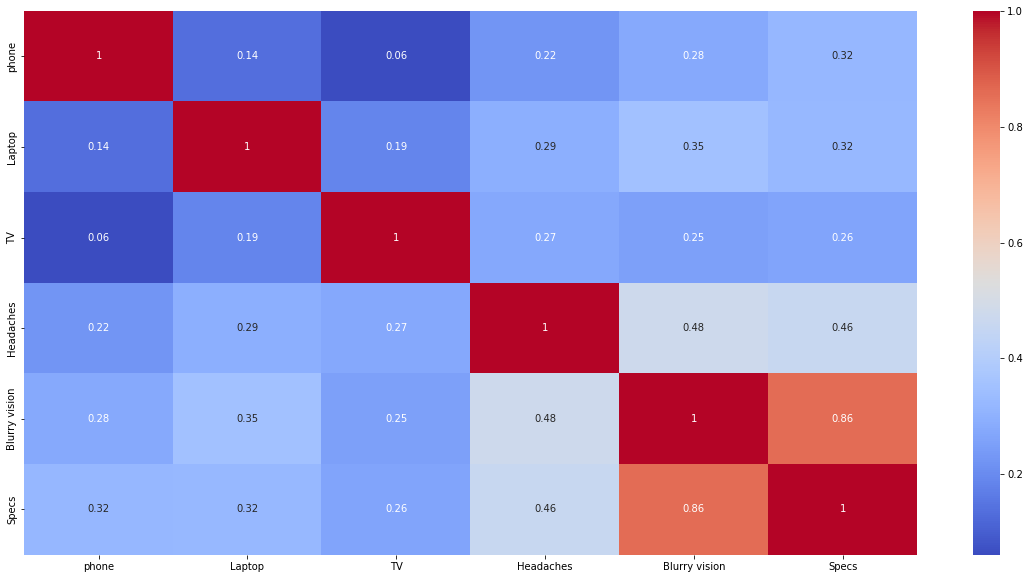

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
corr = data.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True, cmap='coolwarm')

# Data Split

In [ ]:
from sklearn.model_selection import train_test_split
dataframe = data.values
X, y = dataframe[:, :-1], dataframe[:, -1]
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 10)
x_train

array([[ 7,  7,  0,  0,  1],
       [10,  4,  4,  0,  1],
       [ 3,  1,  3,  0,  0],
       [ 4,  3,  6,  0,  1],
       [ 2,  2,  1,  0,  0],
       [ 1,  3,  2,  0,  0],
       [ 3,  6,  2,  1,  1],
       [ 4,  3,  1,  0,  0],
       [ 7,  2,  2,  1,  1],
       [ 0,  0,  3,  0,  1],
       [ 9,  3,  1,  1,  0],
       [ 9,  7,  2,  1,  1],
       [ 3,  3,  2,  0,  0],
       [ 4,  3,  1,  0,  0],
       [ 3,  1,  1,  0,  0],
       [ 7,  4,  4,  1,  1],
       [ 6,  3,  1,  0,  0],
       [ 6,  4,  1,  1,  1],
       [ 6,  2,  3,  0,  0],
       [ 6,  4,  7,  1,  1],
       [ 4,  1,  4,  1,  1],
       [ 4,  2,  5,  1,  1],
       [ 8,  7,  1,  0,  1],
       [ 7,  5,  2,  1,  1],
       [ 4,  1,  0,  0,  0],
       [ 4,  5,  1,  1,  1],
       [ 6,  3,  1,  1,  1],
       [ 1,  3,  2,  0,  0],
       [ 5,  0,  6,  0,  0],
       [ 6,  3,  1,  0,  0],
       [ 4,  1,  2,  0,  0],
       [ 8,  0,  3,  0,  0],
       [ 5,  3,  1,  1,  0],
       [ 8,  4,  1,  0,  1],
       [ 2,  4

#Initialization

In [ ]:
w1=random.uniform(-10,10)
w2=random.uniform(-10,10)
w3=random.uniform(-10,10)
w4=random.uniform(-10,10)
w5=random.uniform(-10,10)
bias=random.uniform(-10,10)
eta=0.01
max_iter=100000

# Model Training Using Stochastic Gradient Descent Algorithm

In [ ]:
for iter in range(max_iter):
  for sample in range(x_train.shape[0]):
    net=w1*x_train[sample,0]+w2*x_train[sample,1]+w3*x_train[sample,2]+w4*x_train[sample,3]+w5*x_train[sample,4]+bias
    p=1/(1+mt.exp(-net))
    w1=w1-eta*x_train[sample,0]*(p-y_train[sample])
    w2=w2-eta*x_train[sample,1]*(p-y_train[sample])
    w3=w3-eta*x_train[sample,2]*(p-y_train[sample])
    w4=w4-eta*x_train[sample,3]*(p-y_train[sample])
    w5=w5-eta*x_train[sample,4]*(p-y_train[sample])
    bias=bias-eta*(p-y_train[sample])
print(f'Model parameters:\n w1= ',w1, '\nw2 = ',w2, '\nw3 = ',w3, '\nw4 = ',w4, '\nw5 = ',w5, '\nBias = ',bias)

Model parameters:
 w1=  0.12667459184066146 
w2 =  0.0673760659919008 
w3 =  0.06568336929948261 
w4 =  0.6183046262480916 
w5 =  4.881519375720704 
Bias =  -3.824650876516356


# Prediction on training data

In [ ]:
y_pred_train = []
for sample in range(x_train.shape[0]):
  x1=x_train[sample,0]
  x2=x_train[sample,1]
  x3=x_train[sample,2]
  x4=x_train[sample,3]
  x5=x_train[sample,4]
  y=y_train[sample]
  net=w1*x_train[sample,0]+w2*x_train[sample,1]+w3*x_train[sample,2]+w4*x_train[sample,3]+w5*x_train[sample,4]+bias
  y_p_tr = np.round(1/(1+mt.exp(-net)))
  y_pred_train.append(y_p_tr)
y_pred_train = np.array(y_pred_train)

In [ ]:
y_pred_train

array([1., 1., 0., 1., 0., 0., 1., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0.,
       1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 0., 1.,
       0., 0., 1., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1.,
       0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0.,
       0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0.,
       1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0.,
       1., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1.,
       0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 0.,
       1., 0., 1., 0., 0., 1., 0., 1., 0., 1., 1., 1.])

# Prediction on testing data

In [ ]:
y_train

array([1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       1])

In [ ]:
y_pred_test = []
for sample in range(x_test.shape[0]):
  x1=x_test[sample,0]
  x2=x_test[sample,1]
  x3=x_test[sample,2]
  x4=x_test[sample,3]
  x5=x_test[sample,4]
  y=y_test[sample]
  net=w1*x_test[sample,0]+w2*x_test[sample,1]+w3*x_test[sample,2]+w4*x_test[sample,3]+w5*x_test[sample,4]+bias
  y_p_te = np.round(1/(1+mt.exp(-net)))
  y_pred_test.append(y_p_te)
y_pred_test = np.array(y_pred_test)

# Accuracy of the model

In [ ]:
from sklearn.metrics import accuracy_score
train_accuracy=accuracy_score(y_train, y_pred_train)
train_accuracy

0.9195979899497487

In [ ]:
test_accuracy=accuracy_score(y_test, y_pred_test)
test_accuracy

0.96

#Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred_test)

array([[21,  0],
       [ 2, 27]])

#Deployment

In [ ]:
print('\nEnter the number of hours you spend on following gadgets each day:\n')
a=input('Phone ')
b=input('Laptop/Computer ')
c=input('TV ')
d=input('Do you have frequent headaches? (Yes/No)')
d=d.lower()
if(d=='yes'):
  f=1
else:
  f=0
e=input('Do you have a blurry vision?')
e=e.lower()
if(e=='yes'):
  g=1
else:
  g=0
Y=w1*float(a)+w2*float(b)+w3*float(c)+w4*float(f)+w5*float(g)+bias
p=np.round(1/(1+mt.exp(-Y)))
if(p==1):
  print('Prediction: You need spectacles')
if(p==0):
  print("Prediction: You don't need spectacles")



Enter the number of hours you spend on following gadgets each day:

Phone 1
Laptop/Computer 2
TV 1
Do you have frequent headaches? (Yes/No)no
Do you have a blurry vision?yes
Prediction: You need spectacles


## Thank you